In [1]:
# call required functions from modules 

#sys.path.append('code_py3/')
import numpy as np
from cmass_modules import io
from utils import matchCatalogsbyPosition, hpHEALPixelToRaDec, HealPixifyCatalogs, spatialcheck
from xd import mixing_color, XD_fitting_X, assignCMASSProb, doVisualization_1d
from run_DMASS_Y3 import priorCut_test

# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'photoz_GOLD_'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z',
            'COADD_OBJECT_ID', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z','EXTENDED_CLASS_MASH_SOF', 'DNF_ZMC_MOF', 'DNF_ZMC_SOF', 'DNF_ZMEAN_MOF', 'DNF_ZMEAN_SOF'] 
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes
mask_magcut = priorCut_test(gold_st82)
gold_st82 = gold_st82[mask_magcut]
gold_st82 = gold_st82[(gold_st82['EXTENDED_CLASS_MASH_SOF'] == 3)]

def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

print(gold_st82.size)    
gold_st82 = keepGoodRegion(gold_st82)
print(gold_st82.size)

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.



Calling catalogs >>>
photoz_GOLD_000002.fits
photoz_GOLD_000003.fits
photoz_GOLD_000011.fits
photoz_GOLD_000001.fits
photoz_GOLD_000005.fits
photoz_GOLD_000009.fits
photoz_GOLD_000008.fits
photoz_GOLD_000010.fits
photoz_GOLD_000004.fits
photoz_GOLD_000007.fits
photoz_GOLD_000006.fits
reading 1/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000002.fits
reading 2/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000003.fits
reading 3/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000011.fits
reading 4/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000001.fits
reading 5/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000005.fits
reading 6/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000009.fits
reading 7/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000008.fits
reading 8/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000010.fits
reading 9/11 /fs/scratch/PCON0008/warner785/bwarner/photoz_GOLD_000004.fits
reading 10/11 /fs/scratch/PCON

In [2]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import healpy

import matplotlib.pyplot as plt
import numpy as np
from run_systematics import sys_iteration, weightmultiply, fitting_allSP, calling_sysMap
from sys_functions import *

In [3]:
import numpy as np

with open('fullCMASSnz.txt') as f:
    cmass = f.read()
    cmass = np.array(cmass)
    #print(cmass)

with open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt') as g:
    dmass = g.read()
    dmass = np.array(dmass)
    #print(dmass)

In [4]:
z = []
w = 0

g = open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    z.append(np.float(data[w]))
g.close()

In [5]:
dmass_nz = []
w = 1

g = open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    dmass_nz.append(np.float(data[w]))
g.close()

area = np.trapz(dmass_nz,z)
print(area)
dmass_norm = dmass_nz/area
area2 = np.trapz(dmass_norm,z)
print(area2)

556.2061238596043
1.0


In [6]:
dmass_error = []
w = 2

g = open('y6dmass_small_clusteringz_nocorr_earlyNov23_cutrange_z_nz_err.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    dmass_error.append(np.float(data[w]))
g.close()

norm_error = dmass_error/area

In [7]:
z2 = []
w = 0

g = open('fullCMASSnz.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    z2.append(np.float(data[w]))
g.close()

#print(z2)

cmass_nz = []
w = 1

g = open('fullCMASSnz.txt', 'r')
for line in g:
    line = line.strip()
    data = line.split(' ')
    data = np.array(data)
    #print(data[0])
    cmass_nz.append(np.float(data[w]))
g.close()

#print(cmass_nz)

In [8]:
dmass_spt = calling_catalog('/fs/scratch/PCON0008/warner785/bwarner/dmass_spt.fits')
index_mask = np.argsort(dmass_spt)
dmass_chron_spt = dmass_spt[index_mask]

dmass_val = calling_catalog('/users/PCON0003/warner785/DMASSY3/output/test/train_cat/y3/dmass_part2.fits')
index_mask2 = np.argsort(dmass_val)
dmass_chron_val = dmass_val[index_mask2]

prob_st82 = calling_catalog('../output/test/train_cat/y3/dmass_st82_part1.fits')

Resulting catalog size
DMASS= 341117.6414259936
Resulting catalog size
DMASS= 27833.545127855094
Resulting catalog size
DMASS= 20206.04487947579


In [9]:
input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
input_keyword = 'gold_spt_photoz_'
#input_keyword ='test_'
columns =  ['RA', 'DEC',   
            'COADD_OBJECT_ID', 'DNF_ZMC_MOF', 'DNF_ZMC_SOF', 'DNF_ZMEAN_MOF', 'DNF_ZMEAN_SOF']
gold_spt = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)


Calling catalogs >>>
gold_spt_photoz_000001.fits
gold_spt_photoz_000010.fits
gold_spt_photoz_000015.fits
gold_spt_photoz_000007.fits
gold_spt_photoz_000012.fits
gold_spt_photoz_000009.fits
gold_spt_photoz_000016.fits
gold_spt_photoz_000005.fits
gold_spt_photoz_000003.fits
gold_spt_photoz_000006.fits
gold_spt_photoz_000017.fits
gold_spt_photoz_000004.fits
gold_spt_photoz_000013.fits
gold_spt_photoz_000019.fits
gold_spt_photoz_000002.fits
gold_spt_photoz_000018.fits
gold_spt_photoz_000014.fits
gold_spt_photoz_000008.fits
gold_spt_photoz_000011.fits
reading 1/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000001.fits
reading 2/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000010.fits
reading 3/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000015.fits
reading 4/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000007.fits
reading 5/19 /fs/scratch/PCON0008/warner785/bwarner/gold_spt_photoz_000012.fits
reading 6/19 /fs/scratch/PCON0008/warner785/bw

In [27]:
# 'DNF_ZMC_MOF', 'DNF_ZMC_SOF', 'DNF_ZMEAN_MOF', 'DNF_ZMEAN_SOF'


def photoz_column(catalog, region):
    
    photoz = 0
    photoz = np.full(1000000000, hp.UNSEEN)
    print(region)
    if region == "st82":
        photoz[gold_st82['COADD_OBJECT_ID']] = gold_st82['DNF_ZMEAN_MOF']
    if region == "spt":
        photoz[gold_spt['COADD_OBJECT_ID']] = gold_spt['DNF_ZMEAN_MOF']
    photoz_cat = photoz[catalog['COADD_OBJECT_ID']]
    
    return photoz_cat

In [28]:
photoz_train = photoz_column(prob_st82, "st82")
photoz_val = photoz_column(dmass_chron_val, "st82")
photoz_spt = photoz_column(dmass_chron_spt, "spt")

st82
st82
spt


No handles with labels found to put in legend.


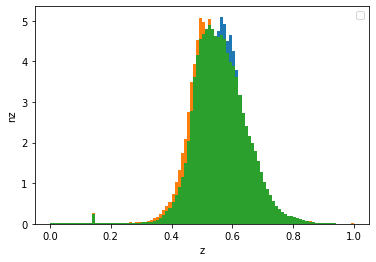

In [29]:
fig, ax = plt.subplots()

#print(photoz_val2)
plt.legend()
plt.xlabel("z")
plt.ylabel("nz")
nz_val = ax.hist( photoz_val[photoz_val!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_val["CMASS_PROB"][photoz_val!=hp.UNSEEN], label = "des photoz validation")
nz_train = ax.hist( photoz_train[photoz_train!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = prob_st82["CMASS_PROB"][photoz_train!=hp.UNSEEN], label = "des photoz train")
nz_spt = ax.hist( photoz_spt[photoz_spt!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_spt["CMASS_PROB"][photoz_spt!=hp.UNSEEN], label = "des photoz spt")

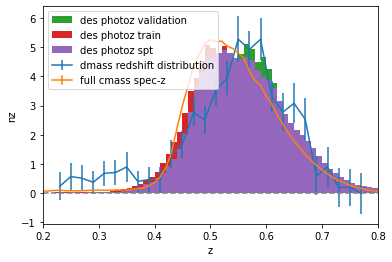

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.errorbar( z, dmass_norm, yerr=norm_error, label = "dmass redshift distribution")
ax.errorbar( z2, cmass_nz, yerr=0, label = "full cmass spec-z")
nz_val = ax.hist( photoz_val[photoz_val!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_val["CMASS_PROB"][photoz_val!=hp.UNSEEN], label = "des photoz validation")
nz_train = ax.hist( photoz_train[photoz_train!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = prob_st82["CMASS_PROB"][photoz_train!=hp.UNSEEN], label = "des photoz train")
nz_spt = ax.hist( photoz_spt[photoz_spt!=hp.UNSEEN], bins=np.linspace(0, 1.0, 101), density=True, weights = dmass_chron_spt["CMASS_PROB"][photoz_spt!=hp.UNSEEN], label = "des photoz spt")
#ax.hist( cmass_train['Z'], bins=np.linspace(0, 1.0, 101), density=True, color = "purple", label = "cmass training")
plt.legend()
plt.xlabel("z")
plt.ylabel("nz")
plt.xlim(0.2, 0.8)
plt.axhline(y=0, color='grey', linestyle='--')